#### This notebook contains:
1. Customer retention analysis
2. Generating E-commerce metrics
3. RMF analysis
4. Statistical analysis.

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [2]:
data = pd.read_csv("cleaned_Online_Retail.csv")
data.head(2)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpend,Year,Month,Day_of_Week,Is_weekend
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,Wednesday,0
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,Wednesday,0


In [3]:
data = data.drop(columns=['Unnamed: 0'])
data['Description'] = data['Description'].str.strip()
data['StockCode'] = data['StockCode'].str.strip()
data = data[data['StockCode'].str.contains(r'\d', na=False)]
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

#### Customer Retention

In [4]:
data['OrderMonth'] = data['InvoiceDate'].dt.to_period('M')

# Get customer first order date in year and month
data['CohortMonth'] = data.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')


In [5]:
data['CohortIndex'] = (data['OrderMonth'] - data['CohortMonth']).apply(lambda x: x.n)


In [6]:
cohort_data = data.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()
cohort_data = cohort_data.rename(columns={'CustomerID' : 'Num_customer'})
cohort_data

,CohortMonth,CohortIndex,Num_customer
0,2010-12,0,909
1,2010-12,1,341
2,2010-12,2,305
3,2010-12,3,351
4,2010-12,4,328
...,...,...,...
86,2011-10,1,90
87,2011-10,2,45
88,2011-11,0,308
89,2011-11,1,41


In [7]:
cohort_table = cohort_data.pivot_table(index='CohortMonth', columns='CohortIndex', values='Num_customer')
cohort_table

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,909.0,341.0,305.0,351.0,328.0,369.0,346.0,323.0,322.0,366.0,342.0,458.0,248.0
2011-01,397.0,95.0,113.0,94.0,131.0,118.0,104.0,103.0,122.0,136.0,143.0,60.0,NaN
2011-02,348.0,85.0,67.0,101.0,99.0,87.0,93.0,97.0,96.0,111.0,33.0,NaN,NaN
2011-03,416.0,80.0,109.0,88.0,96.0,71.0,110.0,98.0,120.0,38.0,NaN,NaN,NaN
2011-04,284.0,65.0,63.0,61.0,59.0,68.0,64.0,76.0,24.0,NaN,NaN,NaN,NaN
2011-05,266.0,64.0,45.0,46.0,59.0,64.0,72.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,215.0,44.0,36.0,56.0,54.0,69.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,177.0,39.0,38.0,43.0,50.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,151.0,39.0,37.0,39.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
cohortSizes = cohort_table.iloc[:, 0]
retention = cohort_table.divide(cohortSizes, axis = 0) * 100
retention.round(2)

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,100.0,37.51,33.55,38.61,36.08,40.59,38.06,35.53,35.42,40.26,37.62,50.39,27.28
2011-01,100.0,23.93,28.46,23.68,33.00,29.72,26.20,25.94,30.73,34.26,36.02,15.11,NaN
2011-02,100.0,24.43,19.25,29.02,28.45,25.00,26.72,27.87,27.59,31.90,9.48,NaN,NaN
2011-03,100.0,19.23,26.20,21.15,23.08,17.07,26.44,23.56,28.85,9.13,NaN,NaN,NaN
2011-04,100.0,22.89,22.18,21.48,20.77,23.94,22.54,26.76,8.45,NaN,NaN,NaN,NaN
2011-05,100.0,24.06,16.92,17.29,22.18,24.06,27.07,10.90,NaN,NaN,NaN,NaN,NaN
2011-06,100.0,20.47,16.74,26.05,25.12,32.09,9.77,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,100.0,22.03,21.47,24.29,28.25,11.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,100.0,25.83,24.50,25.83,13.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


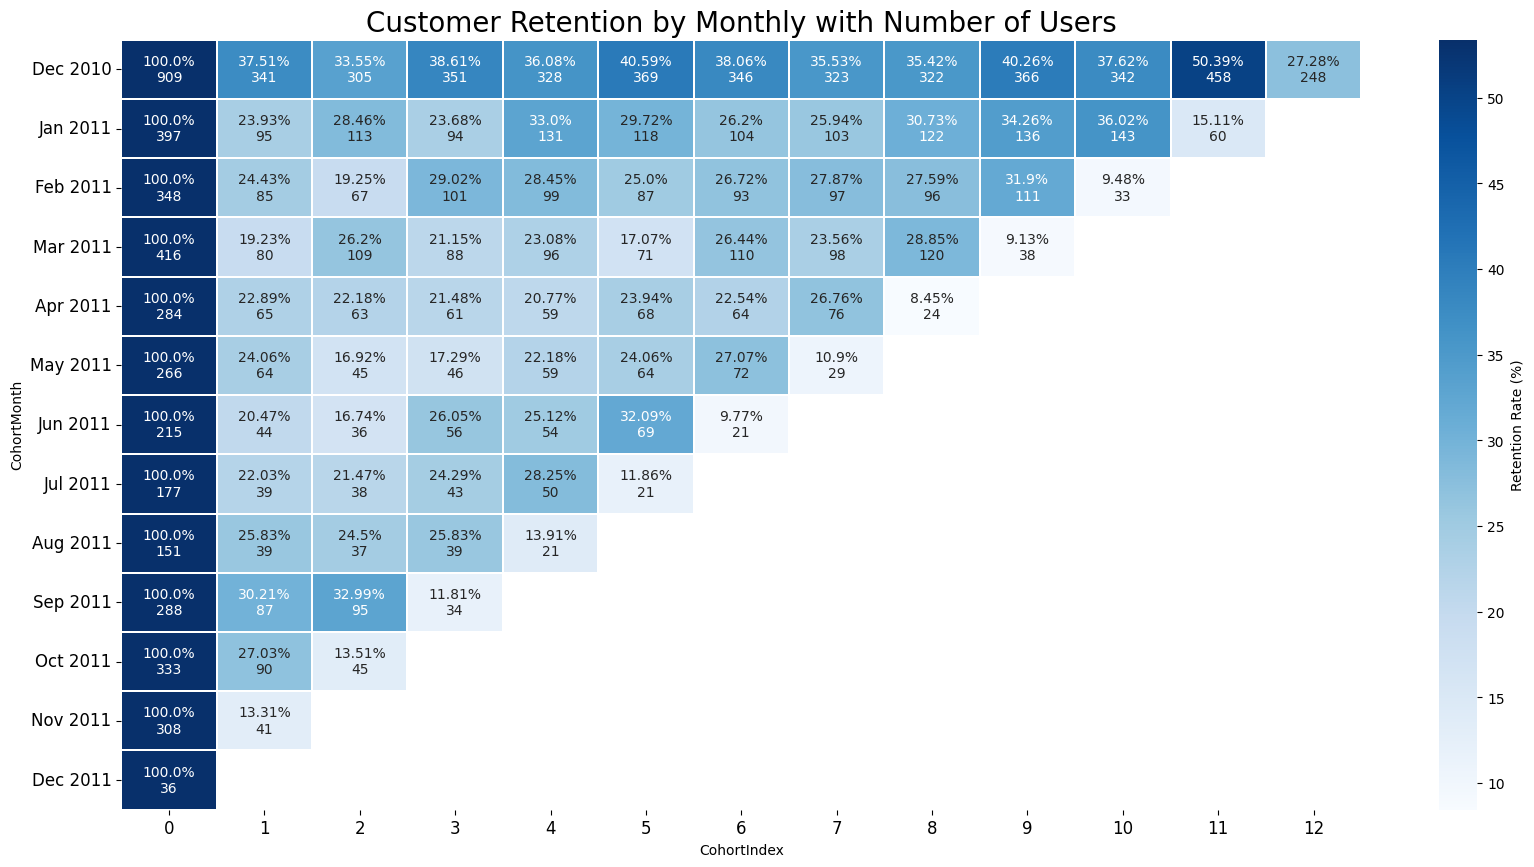

In [139]:
month_list = retention.index.strftime('%b %Y').tolist()

user_counts = cohort_data.pivot_table(index='CohortMonth', columns='CohortIndex', values='Num_customer')

annotations = retention.round(2).astype(str) + "%" + "\n" + user_counts.fillna(0).astype(int).astype(str)

plt.figure(figsize=(20, 10))
plt.title('Customer Retention by Monthly with Number of Users', fontsize=20)

vmax_value = retention.max().nlargest(2).iloc[-1] + 3

sns.heatmap(
    retention.round(2),  
    annot=annotations,   
    cmap="Blues",  
    vmax=vmax_value,  
    fmt='',               
    linewidths=0.3,  
    yticklabels=month_list, 
    cbar_kws={'label': 'Retention Rate (%)'} 
)

# Improve tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)  

plt.show()

____

#### New Customer by day

In [28]:
# Calculate the first purchase date for each customer
data['FirstPurchaseDate'] = data.groupby(['CustomerID', 'Country'])['InvoiceDate'].transform('min').dt.date

# Create a new column to identify first purchases
is_first_purchase = (data['InvoiceDate'].dt.date == data['FirstPurchaseDate'])

# Group by first purchase date and country, count unique customers
new_customers_daily_country = data[is_first_purchase].groupby(['FirstPurchaseDate', 'Country']).agg(Num_New_Customers=('CustomerID', 'nunique')).reset_index()

# Convert dates to datetime for better handling
new_customers_daily_country['FirstPurchaseDate'] = pd.to_datetime(new_customers_daily_country['FirstPurchaseDate'])

country_options = new_customers_daily_country['Country'].unique()

# Create chart
default_country = country_options[0]
filtered_default = new_customers_daily_country[new_customers_daily_country['Country'] == default_country]

fig = go.Figure()

for country in new_customers_daily_country['Country'].unique():
    filtered_data = new_customers_daily_country[new_customers_daily_country['Country'] == country]
    
    fig.add_trace(
        go.Scatter(
            x=filtered_data['FirstPurchaseDate'],
            y=filtered_data['Num_New_Customers'],
            name=country,
            mode='lines+markers',  
            hoverinfo='skip', 
            hovertemplate=
                '<b>Date</b>: %{x}<br>' +
                '<b>Num New Customers</b>: %{y}<br>' +
                '<extra></extra>', 
        )
    )

# Add dropdown for country selection
fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(
                    args=[{"visible": [country == option for country in new_customers_daily_country['Country'].unique()]}],
                    label=option,
                    method="update"
                ) for option in new_customers_daily_country['Country'].unique()
            ],
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ],
    title="New Customers Acquired Each Day by Country",
    xaxis_title="Date",
    yaxis_title="Number of New Customers"
)

# Show the plot
fig.show()

_____


#### E-commerce metrics

In [34]:
# Average Order Value
AOV = data['TotalSpend'].sum() / data['InvoiceNo'].nunique()

# Purchase Frequency
PF = data['InvoiceNo'].nunique() / data['CustomerID'].nunique()

# Customer Value
CV = AOV * PF

print('Average Order Value:', AOV)
print('Average Purchase Frequency:', PF)
print('Average Customer Value:', CV)

Average Order Value: 356.6530607755941
Average Purchase Frequency: 5.066133720930233
Average Customer Value: 1806.852097868217


In [44]:
# Average Customer Lifespan
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
customer_first_purchase = data.groupby('CustomerID')['InvoiceDate'].min()
customer_last_purchase = data.groupby('CustomerID')['InvoiceDate'].max()
ACL = (customer_last_purchase - customer_first_purchase).dt.days.mean()
print('The average customer remains active for approximately', round(abs(ACL)), 'days')

The average customer remains active for approximately 134 days


In [46]:
# Customer Lifetime Value
CLV = CV * ACL
print(f"Customer Lifetime Value (CLV): ${CLV:.2f}")

Customer Lifetime Value (CLV): $242380.80


____

#### RMF analysis

Recency (R): Indicates how recent a customer’s last purchase was. A lower value indicates a more recent purchase.

Frequency (F): Indicates how many times the customer has made purchases. Higher values indicate more frequent purchases.

Monetary (M): Indicates how much money the customer has spent in total. Higher values indicate more valuable customers.

In [219]:
snapshot_date = data['InvoiceDate'].max()

rmf = data.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSpend': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalSpend': 'MonetaryValue'
}).reset_index()
rmf


,CustomerID,Recency,Frequency,MonetaryValue
0,12346.00,325,2,0.00
1,12413.00,66,37,676.15
2,12426.00,194,29,510.73
3,12427.00,11,32,582.37
4,12437.00,1,185,4392.66
...,...,...,...,...
4123,18280.00,277,10,180.60
4124,18281.00,180,7,80.82
4125,18282.00,7,13,176.60
4126,18283.00,3,754,2088.93


In [220]:
# Remove the MonetaryValue that is less than 2
rmf = rmf[rmf['MonetaryValue']>1]

max_recency = rmf['Recency'].max()
max_frequency = rmf['Frequency'].max()
max_monetaryValue = int(rmf['MonetaryValue'].max())

In [221]:
Recency_bins = range(0, max_recency, 7)
Frequency_bins = range(0, max_frequency, 10)
MonetaryValue_bins = range(0, max_monetaryValue, 1000)

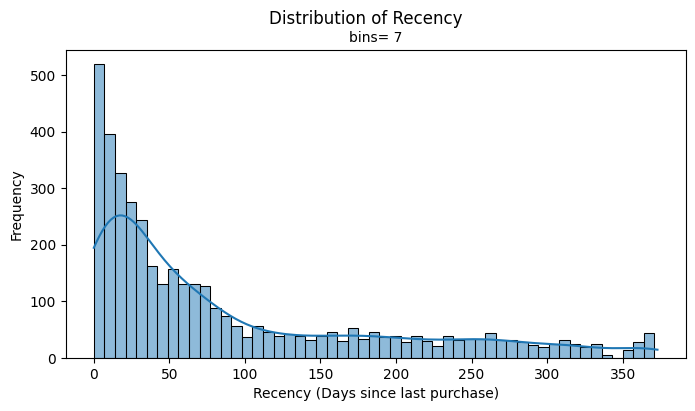

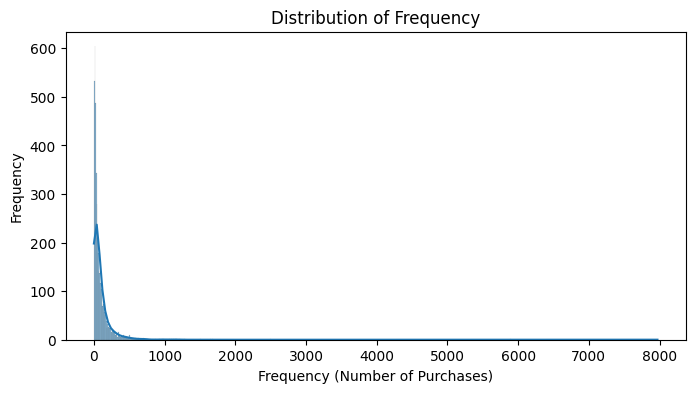

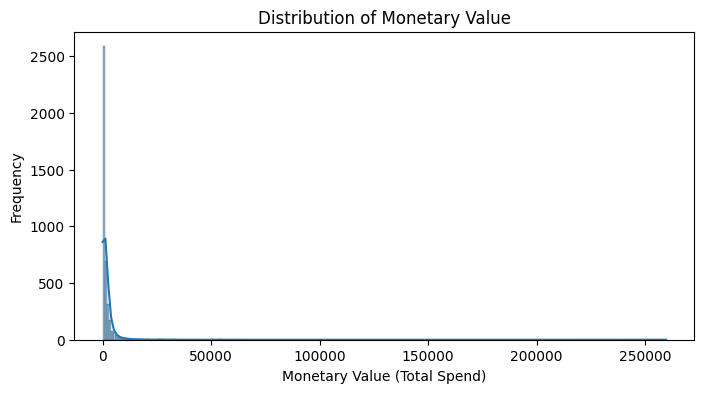

In [222]:
# Plot the distribution of Recency
plt.figure(figsize=(8, 4))
sns.histplot(rmf['Recency'], bins=Recency_bins, kde=True)
plt.suptitle('Distribution of Recency')
plt.title('bins= 7', fontsize=10)
plt.xlabel('Recency (Days since last purchase)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of Frequency
plt.figure(figsize=(8, 4))
sns.histplot(rmf['Frequency'], bins=Frequency_bins, kde=True)
plt.title('Distribution of Frequency')
plt.xlabel('Frequency (Number of Purchases)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of Monetary
plt.figure(figsize=(8, 4))
sns.histplot(rmf['MonetaryValue'], bins=MonetaryValue_bins, kde=True)
plt.title('Distribution of Monetary Value')
plt.xlabel('Monetary Value (Total Spend)')
plt.ylabel('Frequency')
plt.show()

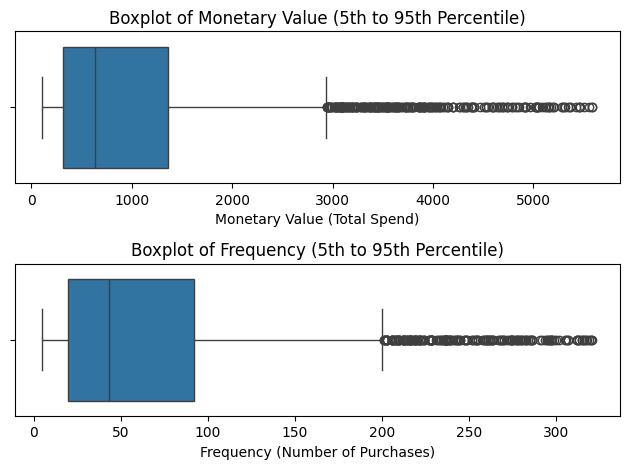

In [223]:
### Create boxplot to show better
# Calculate the 5th and 95th percentiles
monetary_lower_bound = np.percentile(rmf['MonetaryValue'], 5)
monetary_upper_bound = np.percentile(rmf['MonetaryValue'], 95)

frequency_lower_bound = np.percentile(rmf['Frequency'], 5)
frequency_upper_bound = np.percentile(rmf['Frequency'], 95)

# Filter the data to focus on the values within the 5th and 95th percentiles
filtered_data = rmf[(rmf['MonetaryValue'] >= monetary_lower_bound) & (rmf['MonetaryValue'] <= monetary_upper_bound) &
                    (rmf['Frequency'] >= frequency_lower_bound) & (rmf['Frequency'] <= frequency_upper_bound)]

# Boxplot for Monetary Value
plt.subplot(2, 1, 1)
sns.boxplot(x=filtered_data['MonetaryValue'])
plt.title('Boxplot of Monetary Value (5th to 95th Percentile)')
plt.xlabel('Monetary Value (Total Spend)')

# Boxplot for Frequency
plt.subplot(2, 1, 2)
sns.boxplot(x=filtered_data['Frequency'])
plt.title('Boxplot of Frequency (5th to 95th Percentile)')
plt.xlabel('Frequency (Number of Purchases)')

# Show the plot
plt.tight_layout()
plt.show()

In [224]:
pd.options.display.float_format = '{:.2f}'.format
rmf.describe()

,CustomerID,Recency,Frequency,MonetaryValue
count,4089.00,4089.00,4089.00,4089.00
mean,15432.84,89.03,94.34,1825.05
std,1651.45,99.07,236.49,7086.25
min,12413.00,0.00,1.00,2.90
25%,14021.00,16.00,17.00,296.71
50%,15443.00,47.00,42.00,643.63
75%,16843.00,137.00,103.00,1575.16
max,18287.00,373.00,7971.00,259657.30


In [225]:
### Create score
# Recency_score
def create_recency_score(recency):
    if recency <= 7:
        return 5
    elif recency <= 14:
        return 4
    elif recency <= 30:
        return 3
    elif recency <= 47:
        return 2
    else:
        return 1
    
# Frequency_Score
def create_frequency_score(frequency):
    if frequency >= 150:
        return 5
    elif frequency >= 103:
        return 4
    elif frequency >= 75:
        return 3
    elif frequency >= 42:
        return 2
    else:
        return 1
    
# Monetary_Score 
def create_monetary_score(monetary):
    if monetary >= 1500:
        return 5
    elif monetary >= 650:
        return 4
    elif monetary >= 300:
        return 3
    elif monetary >= 100:
        return 2
    else:
        return 1
    
rmf['Recency_Score'] = rmf['Recency'].apply(create_recency_score)
rmf['Frequency_Score'] = rmf['Recency'].apply(create_frequency_score)
rmf['Monetary_Score'] = rmf['Recency'].apply(create_monetary_score)

/var/folders/x_/08j42z3j22377xv4cbjvxw880000gn/T/ipykernel_43221/4219484189.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/x_/08j42z3j22377xv4cbjvxw880000gn/T/ipykernel_43221/4219484189.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/x_/08j42z3j22377xv4cbjvxw880000gn/T/ipykernel_43221/4219484189.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [226]:
# Create RFM score
rmf['RFM_Score'] = rmf[['Recency_Score','Frequency_Score','Monetary_Score']].sum(axis=1)

rmf.head()

/var/folders/x_/08j42z3j22377xv4cbjvxw880000gn/T/ipykernel_43221/765243784.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CustomerID,Recency,Frequency,MonetaryValue,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
1,12413.00,66,37,676.15,1,2,1,4
2,12426.00,194,29,510.73,1,5,2,8
3,12427.00,11,32,582.37,4,1,1,6
4,12437.00,1,185,4392.66,5,1,1,7
5,12441.00,366,10,155.55,1,5,3,9


/var/folders/x_/08j42z3j22377xv4cbjvxw880000gn/T/ipykernel_43221/2696245589.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




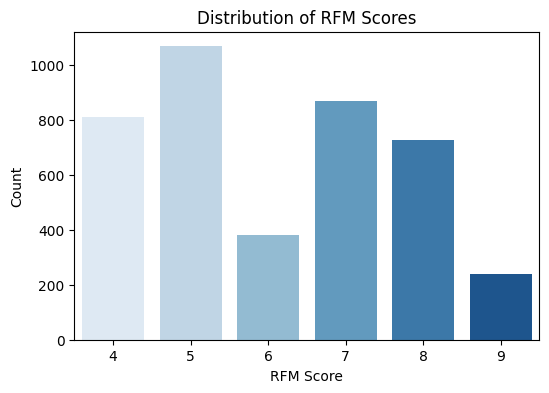

In [227]:
# Distribution of RFM_Score
plt.figure(figsize=(6, 4))
sns.countplot(x=rmf['RFM_Score'], palette='Blues')

plt.title('Distribution of RFM Scores', fontsize=12)
plt.xlabel('RFM Score', fontsize=10)
plt.ylabel('Count', fontsize=10)

# Show the plot
plt.show()

The distribution of your RFM scores suggests that the customer base is skewed towards lower and middle RFM scores. This implies that your customer retention and engagement strategies may need improvement. While the company have some loyal customers, a large portion of your customers might be at risk of churn or may not be engaging frequently enough.

Note: The score can be vary based on the rating strategy.

In [228]:
# Add labels
def map_rfm_score(score):
    if score >= 9:
        return 'Best Customers'
    elif score == 8:
        return 'Loyal Customers'
    elif score == 7 or score == 6:
        return 'Potential Loyalists'
    elif score == 5:
        return 'At Risk'
    elif score <= 4:
        return 'Lost Customers'
    
rmf['RFM_Label'] = rmf['RFM_Score'].apply(map_rfm_score)
rmf['RFM_Label'].value_counts()

/var/folders/x_/08j42z3j22377xv4cbjvxw880000gn/T/ipykernel_43221/2098682437.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



RFM_Label
Potential Loyalists    1248
At Risk                1066
Lost Customers          808
Loyal Customers         727
Best Customers          240
Name: count, dtype: int64

____

#### Statistical Analysis

Multipule Regreeion:

In [233]:
rmf.head(2)

,CustomerID,Recency,Frequency,MonetaryValue,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,RFM_Label
1,12413.00,66,37,676.15,1,2,1,4,Lost Customers
2,12426.00,194,29,510.73,1,5,2,8,Loyal Customers


In [248]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Implement Multiple Linear Regression
X = rmf[['Recency', 'Frequency']]
y = rmf['MonetaryValue']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonetaryValue   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     502.7
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          6.44e-196
Time:                        11:08:42   Log-Likelihood:                -41604.
No. Observations:                4089   AIC:                         8.321e+04
Df Residuals:                    4086   BIC:                         8.323e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        951.2227    145.969      6.517      0.0

##### Result:
Frequency has a much larger positive impact on MonetaryValue compared to Recency. This suggests that customers who buy more frequently tend to spend significantly more money. Therefore, focusing on increasing the frequency of purchases could lead to higher customer spending.

Recency has a negative coefficient, meaning that as the time since the last purchase increases, the MonetaryValue decreases. This show a potential issue with customer engagement or retention. Therefore, re-engaging lapsed customers could be a strategy to boost spending.

##### Problem:
R-squared is low (with 19.7%). This suggests that while Recency and Frequency are significant predictors of MonetaryValue, there are other factors influencing how much customers spend that are not accounted for by this model. This could include factors like customer satisfaction, promotional offers, customer demographics, or specific product preferences.

##### Suggestion:
1. Since frequency is a strong predictor, a marketing strategy focused on rewarding frequent customers (e.g., loyalty programs, discounts for repeat purchases) could be highly effective in increasing overall sales.
2. Re-engage Lapsed Customers: Implement campaigns targeted at customers who have not made a purchase recently, as their spending tends to drop the longer they stay inactive.


ANCOVA:

In [237]:
# ANCOVA: Assume all countries customers behabiour are the same
customer_country = data[['CustomerID', 'Country']]
rmf_country = pd.merge(rmf, customer_country, how='left', on='CustomerID')

In [250]:
formula = 'MonetaryValue ~ C(Country) + Recency + Frequency'

model = ols(formula, data=rmf_country).fit()

ANCOVA_table = sm.stats.anova_lm(model, typ=2)
ANCOVA_table

,sum_sq,df,F,PR(>F)
C(Country),51882917518631.30,3.00,93144.62,0.00
Recency,1010987690973.24,1.00,5445.03,0.00
Frequency,26786845055405.49,1.00,144270.06,0.00
Residual,71624841522084.95,385761.00,NaN,NaN


In [251]:
formula = 'MonetaryValue ~ C(Country) * Recency + C(Country) * Frequency'

model2 = ols(formula, data=rmf_country).fit()

ANCOVA_table2 = sm.stats.anova_lm(model2, typ=2)
ANCOVA_table2

,sum_sq,df,F,PR(>F)
C(Country),51882917518642.31,3.00,95160.81,0.00
Recency,974161442422.45,1.00,5360.26,0.00
C(Country):Recency,1432794712795.08,3.00,2627.95,0.00
Frequency,25502135651493.56,1.00,140323.87,0.00
C(Country):Frequency,333949524504.09,3.00,612.51,0.00
Residual,70106221124312.73,385755.00,NaN,NaN


Country, recent purchase days, and purchase frequency all have a significant impact on the customer's MonetaryValue, with p-values ​​of 0, indicating that these factors are statistically significant.

The interaction effects of country and recent purchase days and country and purchase frequency are also significant. This means that the impact of Recency and Frequency on the amount spent is different among customers in different countries. For example, in some countries, customers who have recently purchased may spend more, while in other countries, the impact of recent purchases may be smaller. Likewise, the impact of frequent buying varies across countries.

_____

In [256]:
cohort_data = data.copy()
cohort_data.to_csv('cohort_data.csv')

In [257]:
rmf.to_csv('rmf.csv')